In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#### Leyendo los datos del archivo "movies"

In [212]:
datos=pd.read_csv("movies.csv", encoding='cp1252')

## Preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos

C:\Users\javi3\AppData\Local\Temp\ipykernel_3360\307878589.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  datos.drop(['id'],1).hist()


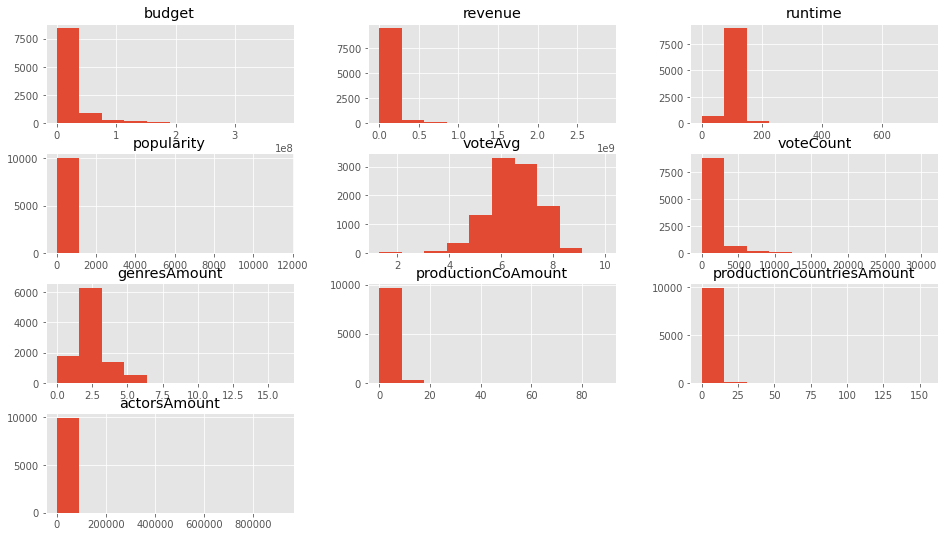

In [213]:
datos.drop(['id'],1).hist()
plt.show()

#### Nótese que ninguna variable cuantitativa tiene una tendencia normal, por lo que todas las variables aportan información a la generación de grupos.

## Analizando la tendencia al agrupamiento usando el estadístico de Hopkings

In [214]:
MD = datos[['budget','revenue','runtime', 'popularity', 'voteAvg', 'voteCount', 'genresAmount', 'productionCoAmount', 'productionCountriesAmount', 'actorsAmount']].sample(5000)

Y = np.array(datos[['id']])

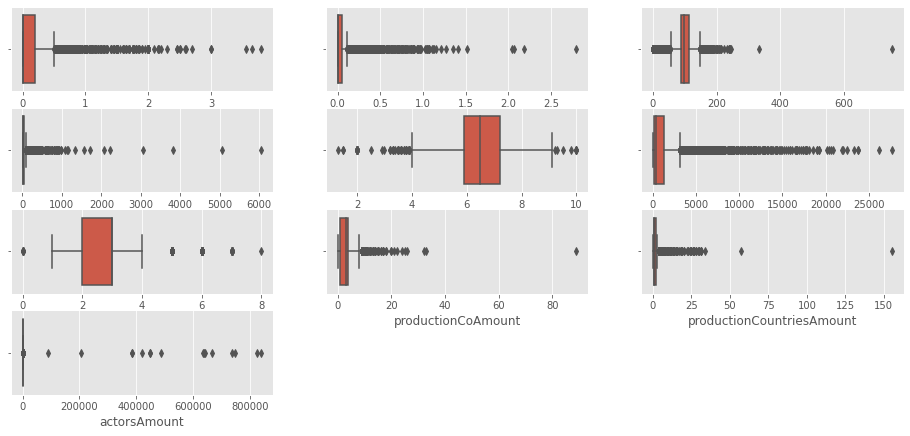

In [215]:
CN = MD.columns.values

fig = plt.figure()
g = 0
for i in CN:
	plt.subplot(5,3,g+1)
	sns.boxplot(MD[i])
	plt.xlabel(i)
	g += 1
plt.show()

In [216]:
n = 0
while n < 30:
    for i in CN:
        MD = MD[(MD[i] < MD[i].mean()+2*(MD[i].std())) & (MD[i] > MD[i].mean()-2*(MD[i].std()))] 
        n += 1





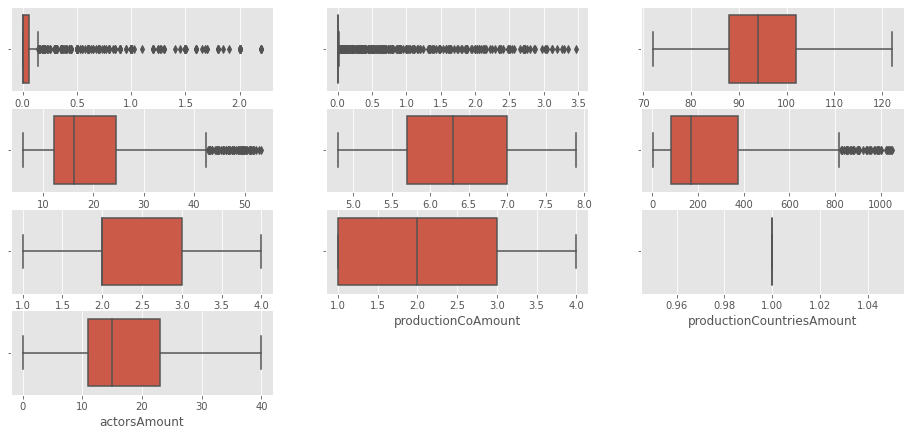

(1102, 10)

<Figure size 1152x648 with 0 Axes>

In [217]:
fig = plt.figure()
CN = MD.columns.values
g = 0
for i in CN:
	plt.subplot(5,3,g+1)
	sns.boxplot(MD[i])
	plt.xlabel(i)
	g += 1
plt.show()
plt.tight_layout()
X = np.array(MD)
X.shape

In [218]:
#X = X.random.seed(10000)
print(X.shape)
X_scale=sklearn.preprocessing.scale(X)
pyclustertend.hopkins(X,len(X))

(1102, 10)


0.12136937670898769

##### Nótese que el estadístico de Hopkings se encuentra muy lejano a 0.5, por lo que sí es factible hacer agrupamiento.

## Analice la tendencia al agrupamiento usando el estadístico VAT (Visual Assessment of cluster Tendency)

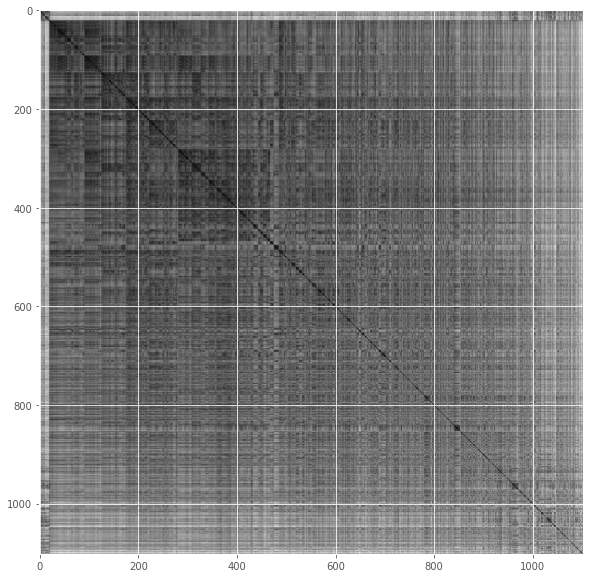

In [219]:
pyclustertend.vat(X_scale)

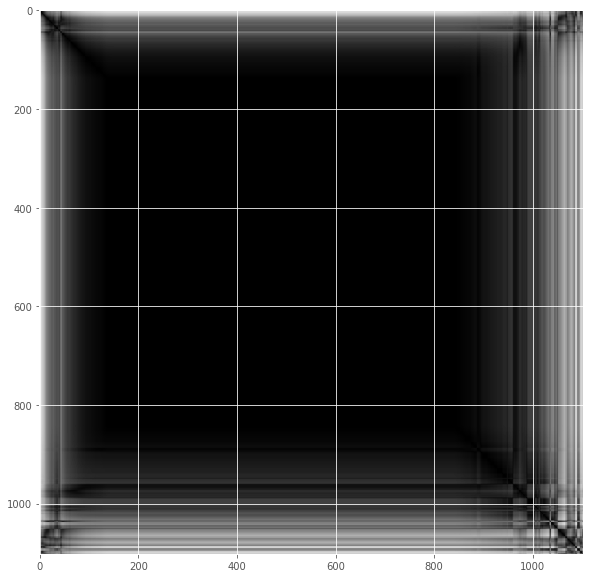

In [220]:
pyclustertend.vat(X)

## Determinando cuál es el número de grupos a formar más adecuado para los datos que está trabajando. 

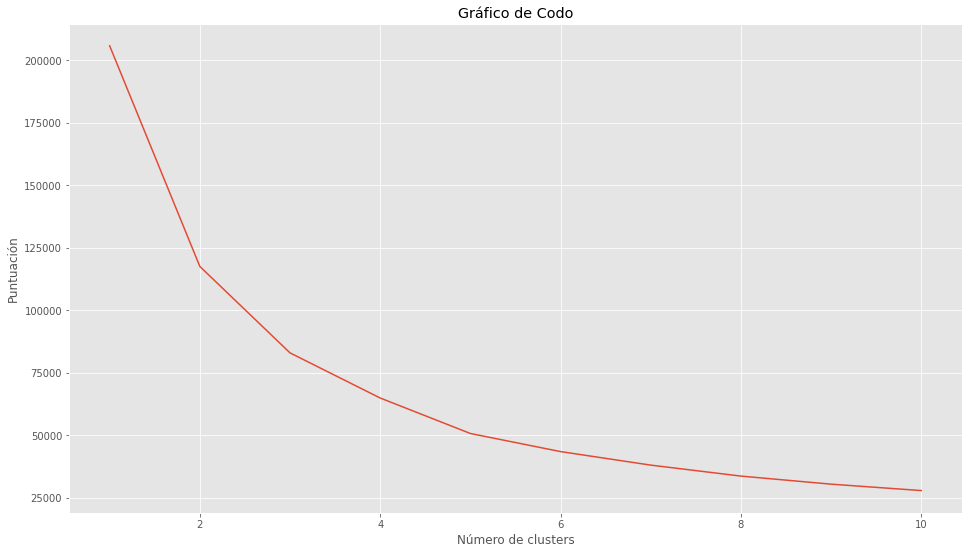

In [95]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("Número de clusters")
plt.ylabel("Puntuación")
plt.title("Gráfico de Codo")
plt.show()

## Gráfica de codo

For n_clusters = 2 The average silhouette_score is : 0.1632884822463161
For n_clusters = 3 The average silhouette_score is : 0.1623332297394089
For n_clusters = 4 The average silhouette_score is : 0.17206354318213285
For n_clusters = 5 The average silhouette_score is : 0.1770747348426583
For n_clusters = 6 The average silhouette_score is : 0.1677435293334117
For n_clusters = 7 The average silhouette_score is : 0.1713739287242936
For n_clusters = 8 The average silhouette_score is : 0.16847166959745313
For n_clusters = 9 The average silhouette_score is : 0.16924982012983295
For n_clusters = 10 The average silhouette_score is : 0.17548227071967282


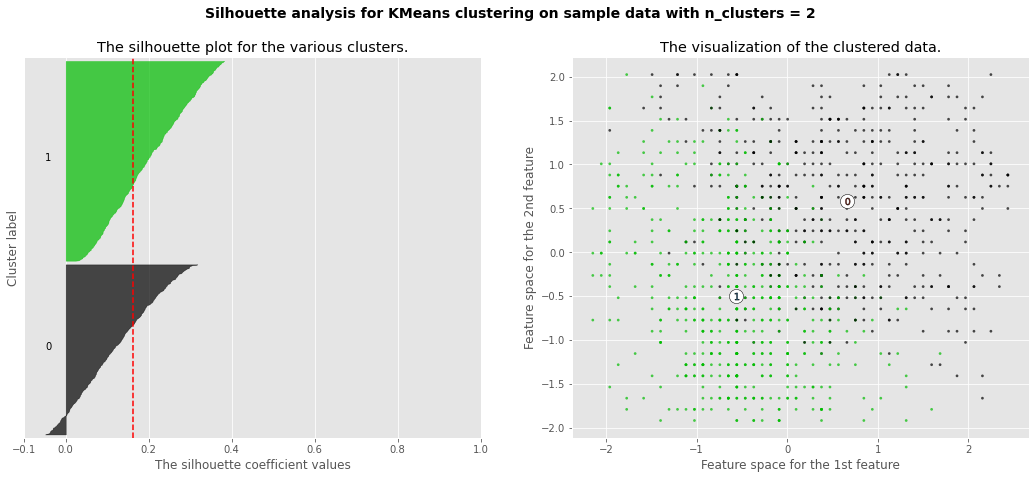

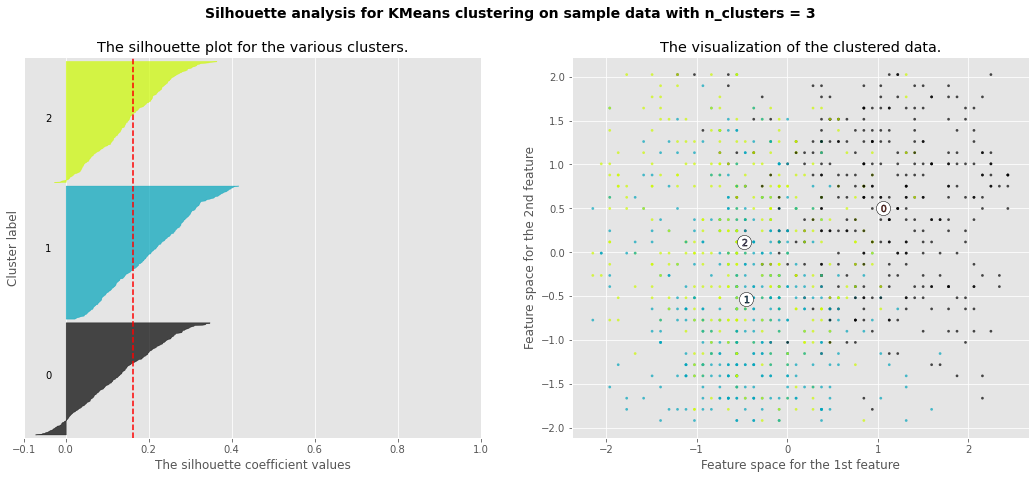

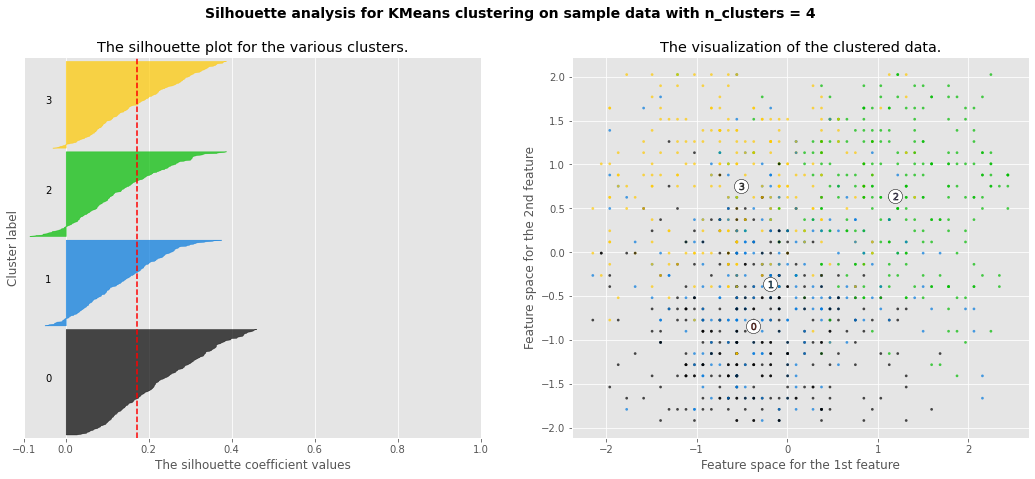

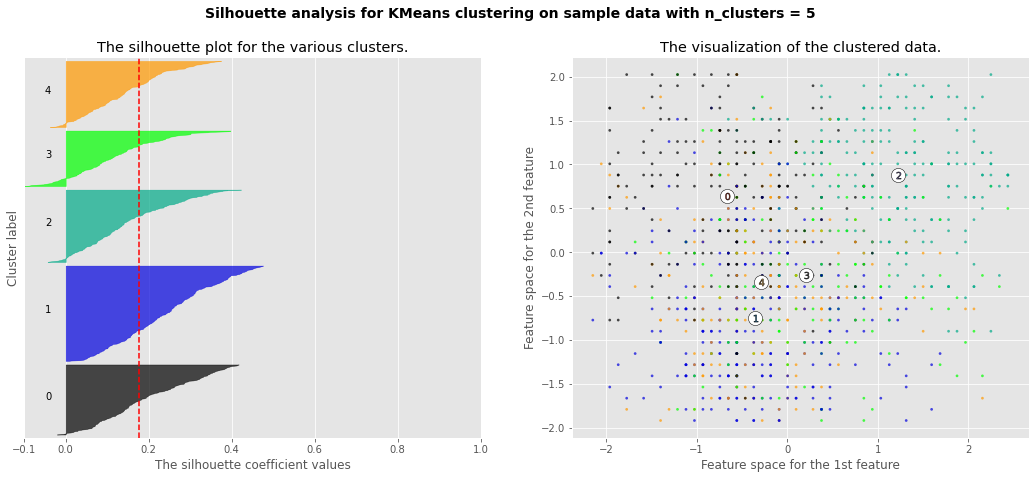

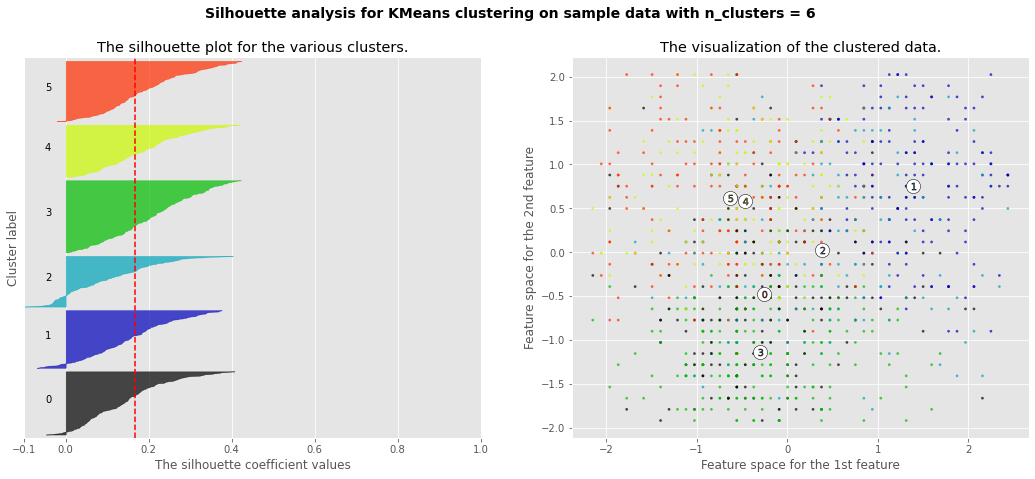

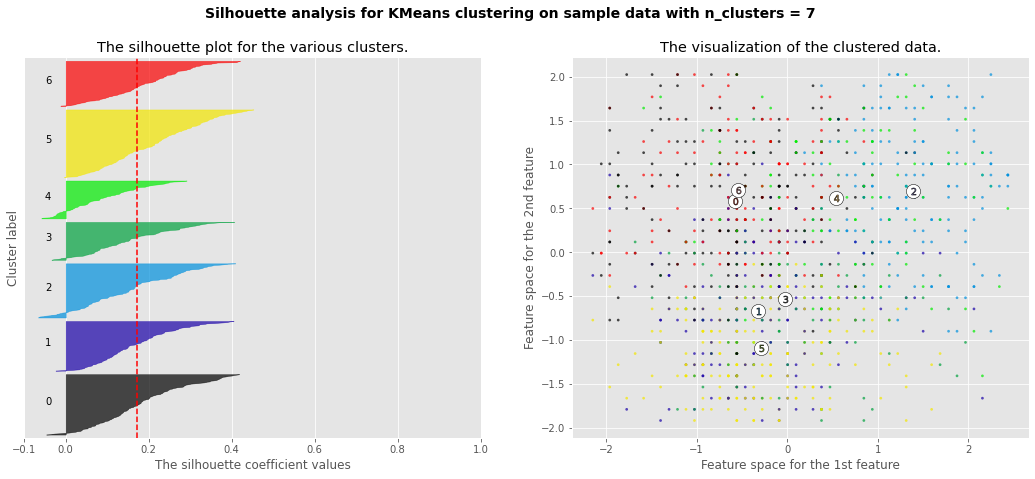

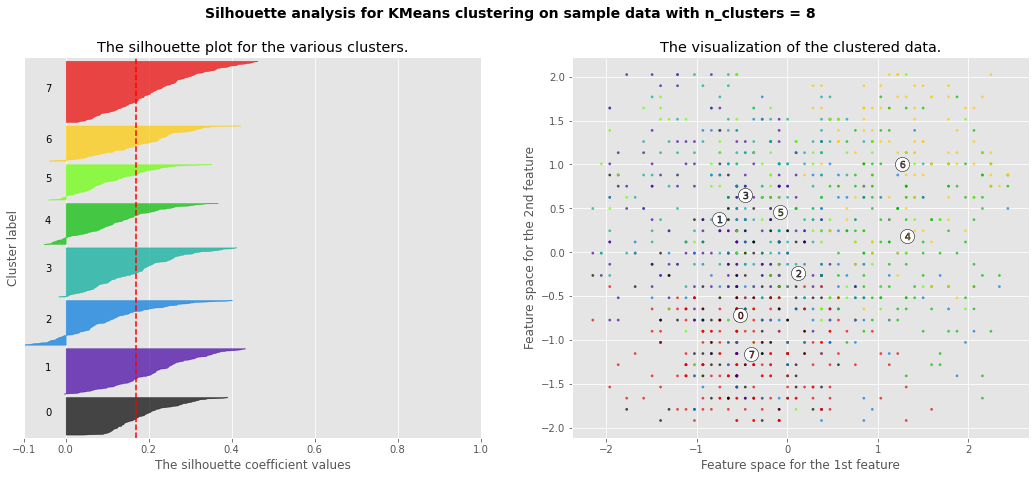

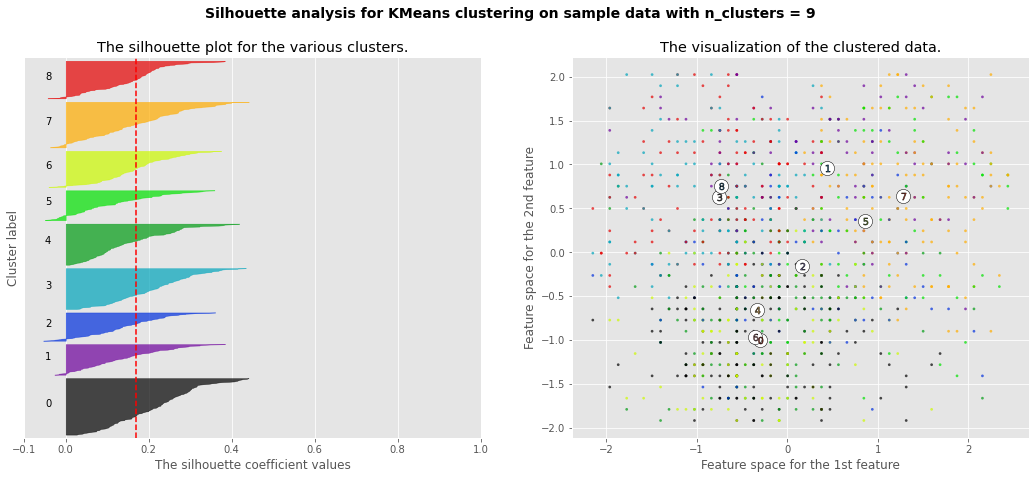

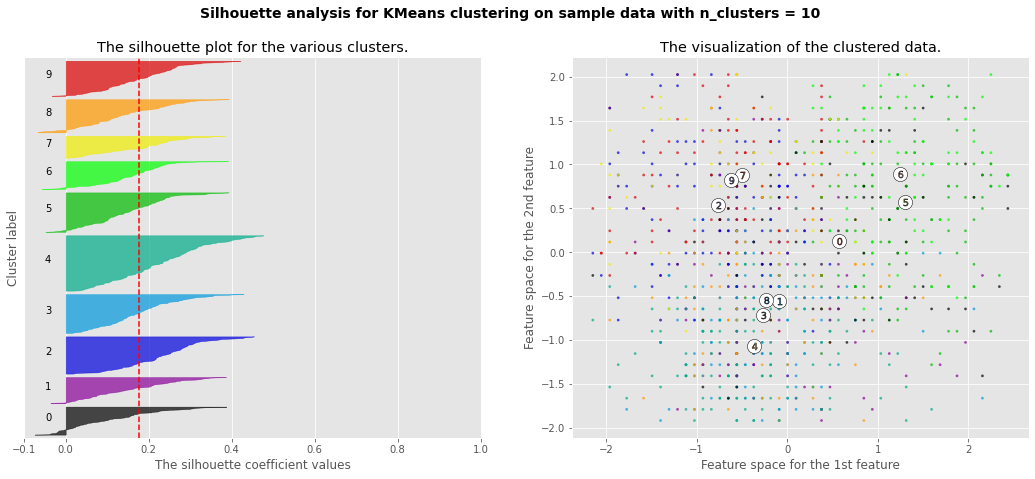

In [96]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

rango_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in rango_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scale)
    silhouette_avg = silhouette_score(X_scale, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X_scale[:, 0], X_scale[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 4  | elbow score: 94,952,912,136,961,024.000


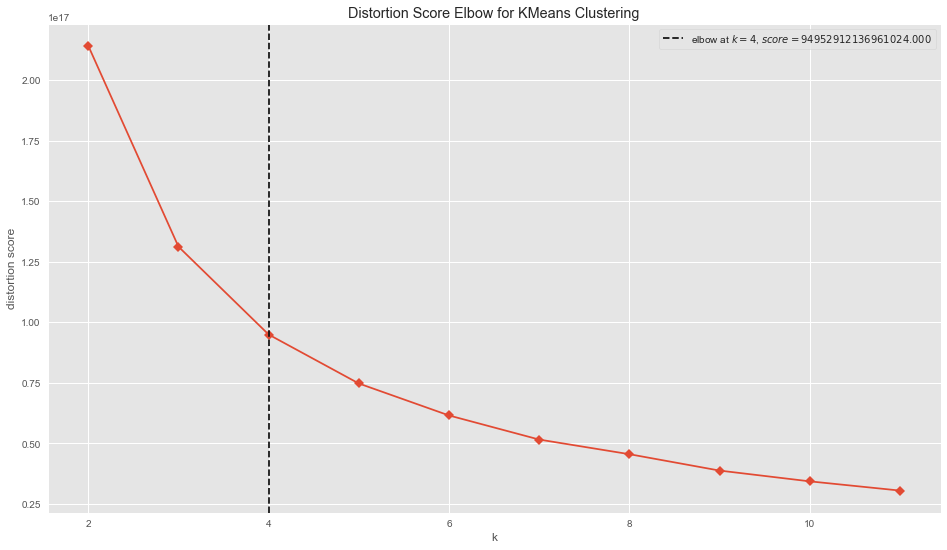

 33%|████████████████████████████                                                        | 1/3 [00:01<00:03,  1.69s/it]

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.773


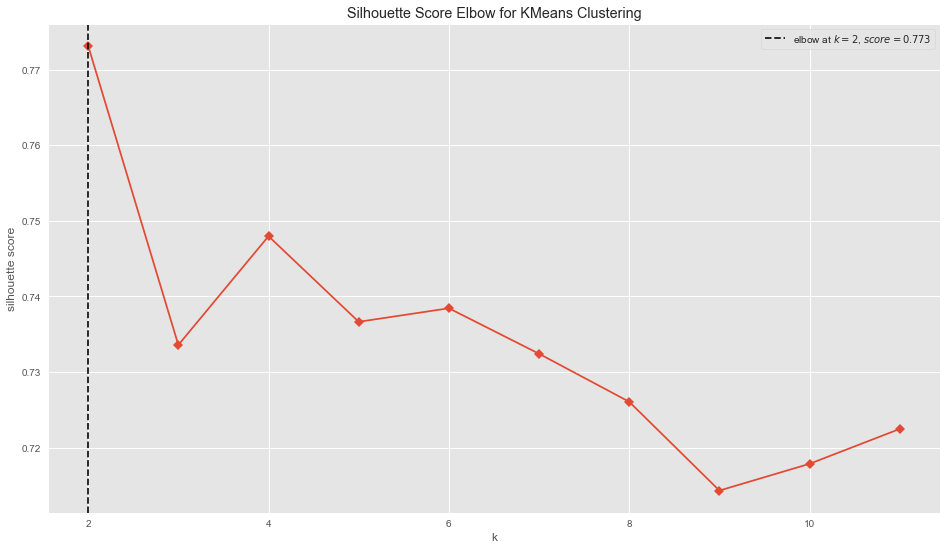

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:04<00:02,  2.17s/it]

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 2  | elbow score: 4,025.249


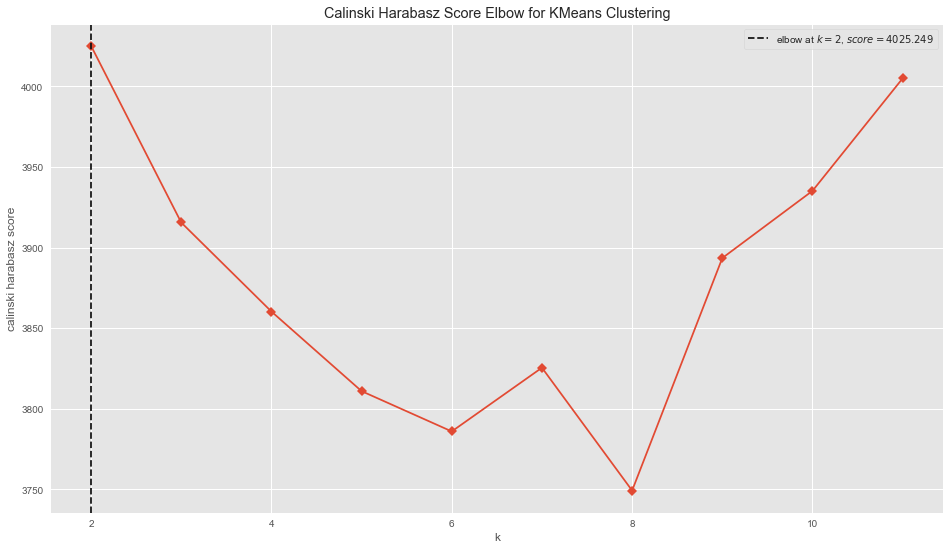

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:05<00:00,  1.92s/it]


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from kmodes.kprototypes import KPrototypes
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from kneed import KneeLocator
from sklearn.decomposition import PCA
from tqdm import tqdm
import sys
import warnings
warnings.filterwarnings("ignore")

nK = 12    
RNDN = 42    
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2,nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

model = KMeans(random_state=RNDN)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]  

# KMedias

### 2 Dimensiones

In [97]:
km = cluster.KMeans(n_clusters=3).fit(X)
centroides = km.cluster_centers_
print(centroides)

[[ 89.16634429   6.23191489   2.35396518   1.93423598  11.54545455]
 [108.85538462   6.55261538   2.30461538   2.01230769  17.35076923]
 [ 93.18367347   6.14571429   2.4244898    2.2244898   27.6       ]]


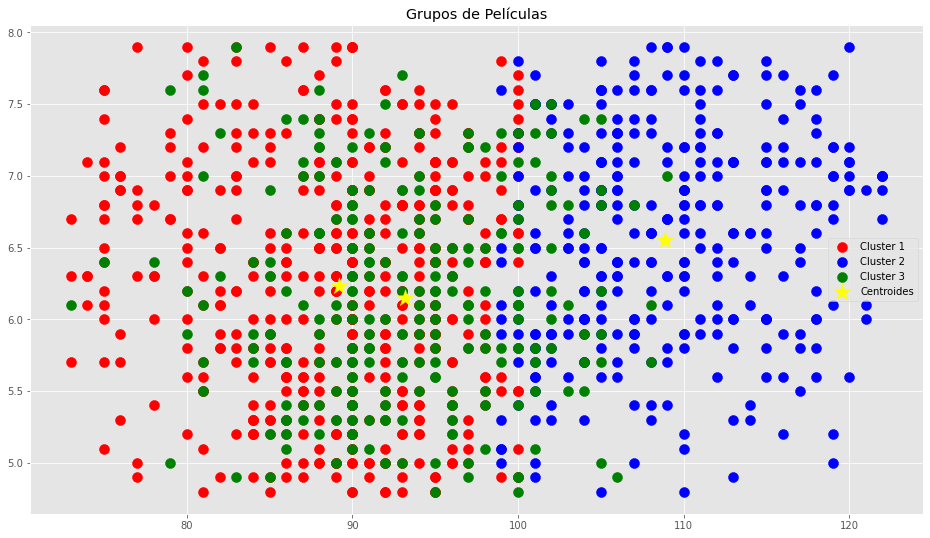

In [98]:
movies = km.predict(X)
plt.scatter(X[movies == 0, 0], X[movies == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[movies == 1, 0], X[movies == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[movies == 2, 0], X[movies == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Películas")
plt.xlabel("")
plt.ylabel("")
plt.legend()

### 3 Dimensiones

C:\Users\javi3\AppData\Local\Temp\ipykernel_32916\1539140579.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


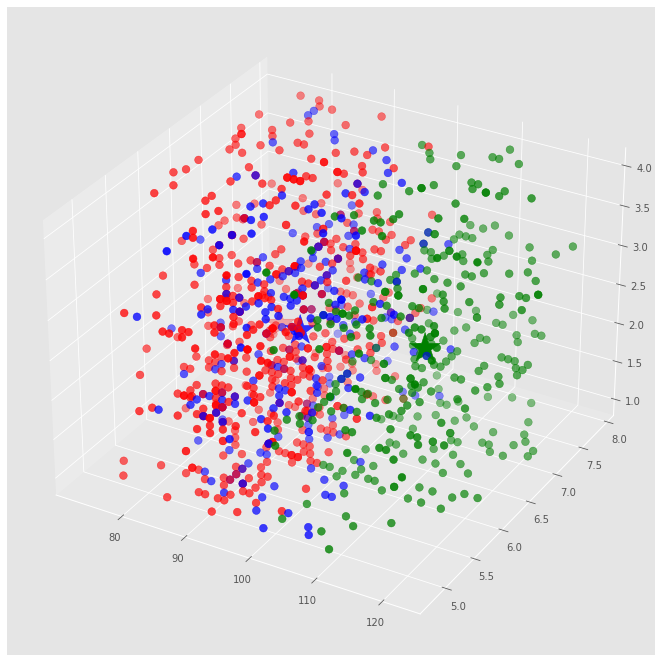

In [99]:
colores = ['red','green','blue']
asignar = []
for movie in movies:
    asignar.append(colores[movie])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(centroides[:, 0], centroides[:, 1], centroides[:, 2], marker='*', c=colores, s=1000)

 ## Clustering Jerárquico

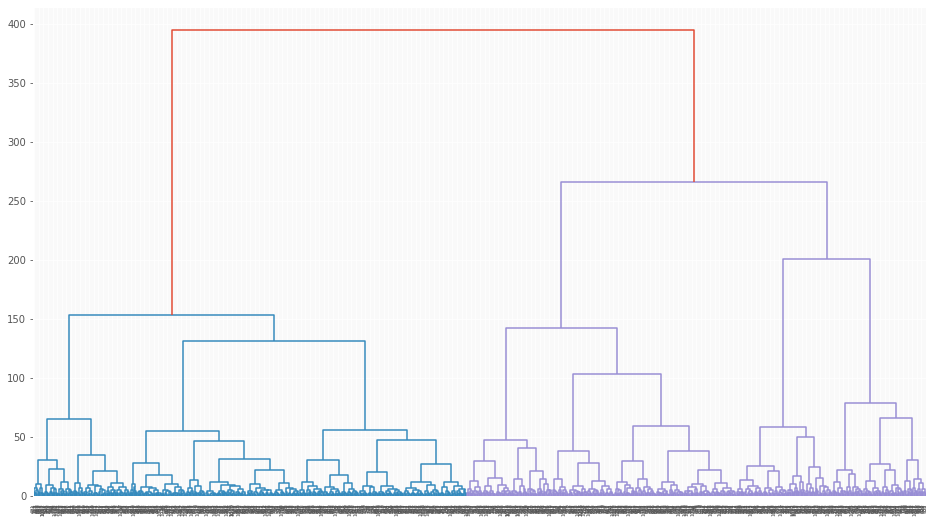

In [100]:
dendograma = sch.dendrogram(sch.linkage(X, method='ward'))

In [101]:
hc = cluster.AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
movieHC = hc.fit_predict(X)
movieHC
X

array([[ 94. ,   6.8,   1. ,   4. ,   2. ],
       [ 95. ,   6. ,   3. ,   2. ,  23. ],
       [ 99. ,   5.5,   3. ,   2. ,  11. ],
       ...,
       [ 96. ,   5. ,   3. ,   1. ,  12. ],
       [103. ,   6.1,   1. ,   2. ,  31. ],
       [100. ,   5.1,   1. ,   4. ,   9. ]])

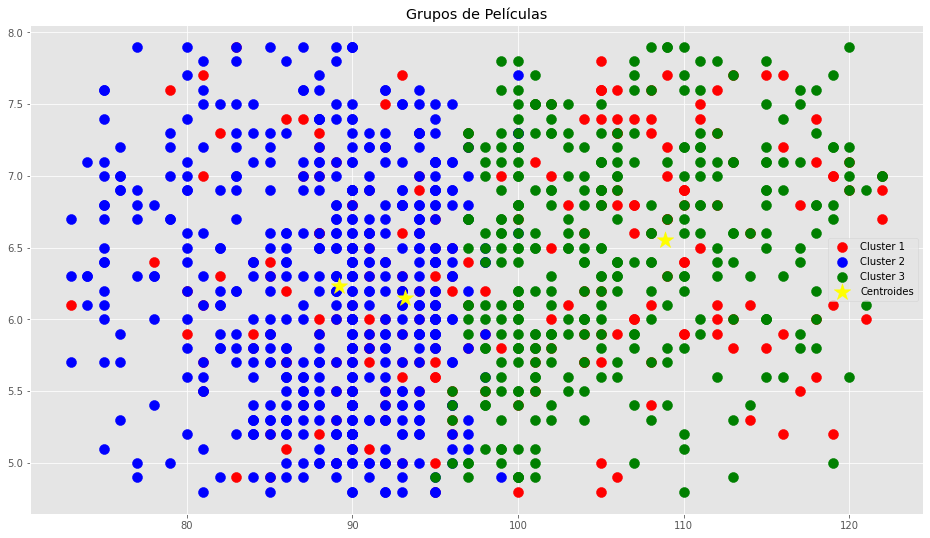

In [102]:
plt.scatter(X[movieHC == 0, 0], X[movieHC == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(X[movieHC == 1, 0], X[movieHC == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.scatter(X[movieHC == 2, 0], X[movieHC == 2, 1],s=100,c='green', label = "Cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=300, c="yellow",marker="*", label="Centroides")
plt.title("Grupos de Películas")
plt.xlabel("")
plt.ylabel("")
plt.legend()

# Fuzzy C-Means

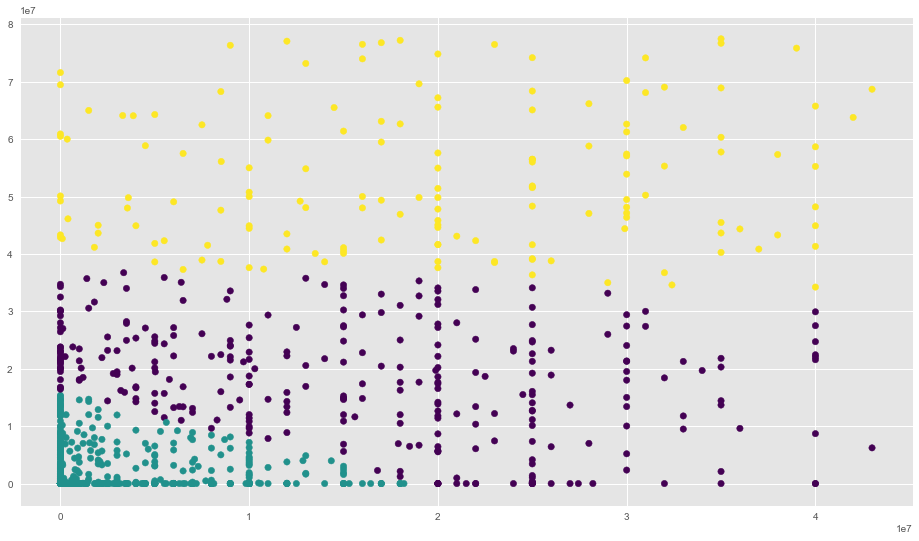

In [83]:
# pip install -U scikit-fuzzy
# pip install fuzzy-c-means
import numpy as np
from fcmeans import FCM # is inside the fuzzy-c-means installation
from matplotlib import pyplot as plt

fcm = FCM(n_clusters=3)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
# f, axes = plt.subplots(1, 2, figsize=(11,5))
# axes[0].scatter(X[:,0], X[:,1], alpha=.1)
# axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
# axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
# plt.show()

plt.scatter(X[:, 0], X[:, 1], c=fcm_labels, s=40,cmap="viridis");

# Mixtures of Gaussians

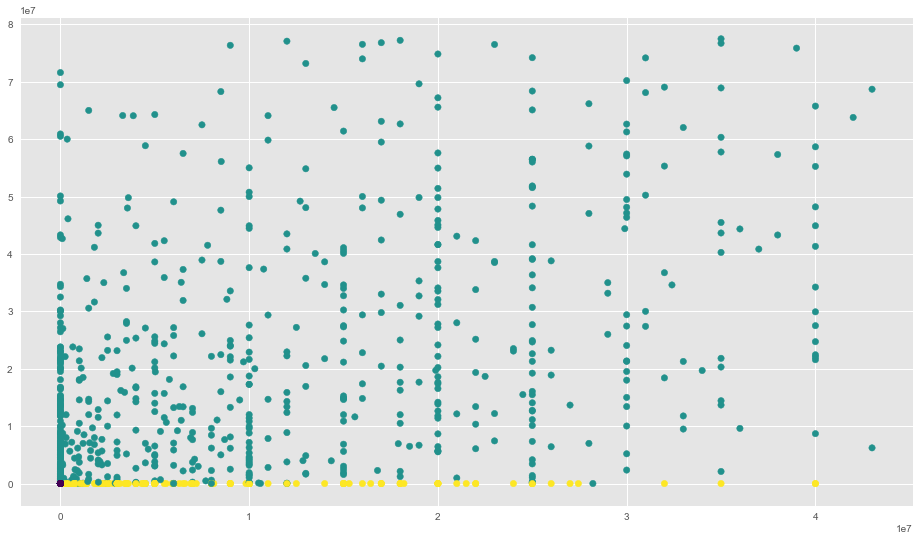

In [84]:
gmm = mixture.GaussianMixture(n_components = 3).fit(X)
labels = gmm.predict(X)
labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40,cmap="viridis");